Step 1: Import the data to clean

In [1]:
# package for data retriving
import requests
from io import StringIO

In [2]:
# package for data processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

In [3]:
# data was pull via kaggle api
# there is not such a web rest api from kaggle to read .csv via link directly without authentication
# so it was host on google drive currently for project purpose solely

host_url = "https://drive.google.com/file/d/10-7rnouldSpZlN22zsvwYlC487UNI8i8/view?usp=sharing"
download_url = 'https://drive.google.com/uc?export=download&id='+ host_url.split('/')[-2]

req_url = requests.get(download_url).text
csv_raw = StringIO(req_url)

## originally = 7787 observations
df = pd.read_csv(csv_raw)

## keeping the raw data as copy
df_raw = df.copy()

Step 2: Clean up

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
## dropped these two columns - director, cast 
## becuase it's unnessary for analyst and large amount of missing values.
df = df.drop(['director','cast'], axis = 1, errors='ignore')

In [6]:
## there were ony 7 missing values of ratings - 
## small sample size 0.001% simply dropped those 7
df=df[df["rating"].notna()]

In [7]:
## there were 10 missing values for date_added - dropped those 10
df=df[df["date_added"].notna()]

In [8]:
df.isna().sum()

show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
# there were 505 missing values for country - dropped those 505
# df=df[df["country"].notna()]
# df

In [10]:
## now there is no more missing values - ending with 7265 observations
df.isna().sum()

show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
#standardlize rating and title column
df['title'] = df['title'].str.upper()
df['rating'] = df['rating'].str.upper()

# instead of removing, replace the country Nan with unknown
df['country'] = df['country'].fillna('unknown')
df['country'] = df['country'].str.upper()

Raw data before cleaning

In [12]:
len(df_raw.index)

7787

Total data after cleaning

In [13]:
len(df.index)

7770

Step 3: Statistical analysis & Step 4: Visualization

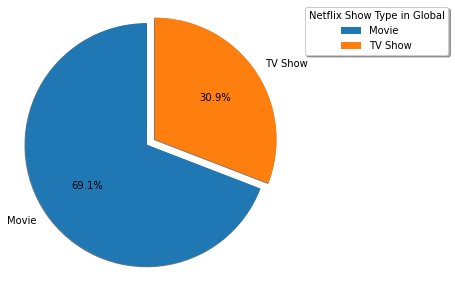

In [14]:
def create_type_pie(vc, title="Type"):
    t_fig, t_ax = plt.subplots(figsize=(5, 5))
    explode = [0.2]* len(vc)
    t_ax.pie(vc.values, explode=explode, labels=vc.index, autopct='%1.1f%%',
            shadow=True, startangle=90, radius= 5)

    t_ax.legend(title=title,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0, shadow=True)
    t_ax.axis('equal')
    plt.show()

type_vc = df['type'].value_counts()
create_type_pie(type_vc, 'Netflix Show Type in Global')

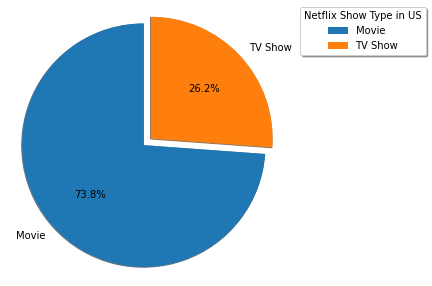

In [15]:
type_us = df[df['country'].str.contains("UNITED STATES")]
type_vc_us = type_us['type'].value_counts()
create_type_pie(type_vc_us, 'Netflix Show Type in US')

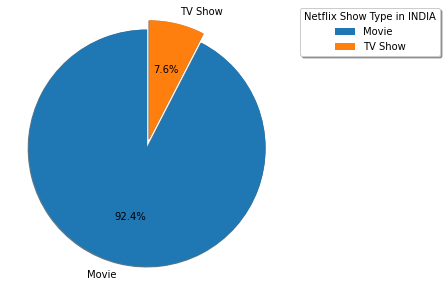

In [16]:
type_india = df[df['country'].str.contains("INDIA")]
type_vc_india = type_india['type'].value_counts()
create_type_pie(type_vc_india, 'Netflix Show Type in INDIA')

In [17]:
country_column = df["country"].str.split(',')
country_df = pd.DataFrame({'country': np.concatenate(country_column.values)})
# clean leading and trailing white space
country_df['country'] = country_df['country'].str.strip()

# get the maximum
df_head = country_df.value_counts().head(3)
# People in United States can watch 3288 shows, more than 3x the second

# get the minimum
df_tail = country_df.value_counts()[country_df.value_counts().values == 1]

print('Countries with most availability: >>>>>>>>>>>')
print(df_head)
print('Countries with least availability: >>>>>>>>>>')
print(df_tail)

Countries with most availability: >>>>>>>>>>>
country       
UNITED STATES     3288
INDIA              990
UNITED KINGDOM     722
dtype: int64
Countries with least availability: >>>>>>>>>>
country           
BERMUDA               1
AFGHANISTAN           1
ALBANIA               1
SRI LANKA             1
SUDAN                 1
BOTSWANA              1
ANGOLA                1
SYRIA                 1
BELARUS               1
BAHAMAS               1
AZERBAIJAN            1
SOMALIA               1
VATICAN CITY          1
ARMENIA               1
UGANDA                1
JAMAICA               1
SLOVAKIA              1
NICARAGUA             1
KAZAKHSTAN            1
LATVIA                1
LIECHTENSTEIN         1
MALAWI                1
MAURITIUS             1
MONGOLIA              1
MONTENEGRO            1
PANAMA                1
SAMOA                 1
ECUADOR               1
EAST GERMANY          1
DOMINICAN REPUBLIC    1
PARAGUAY              1
PUERTO RICO           1
CYPRUS                1


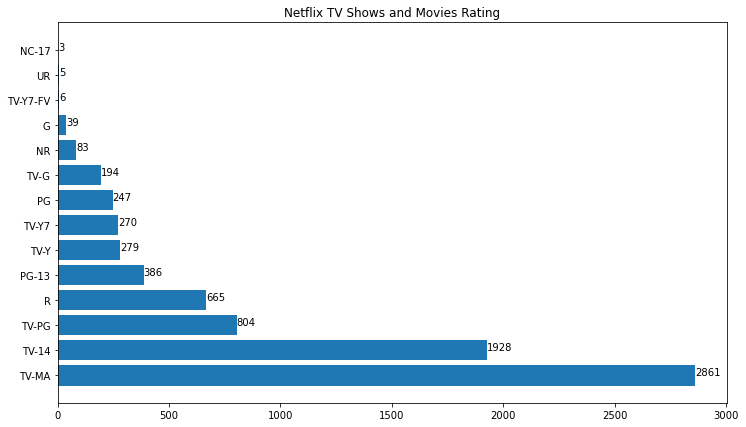

In [18]:
rating = df['rating'].value_counts()
plt.figure(figsize=(12, 7))
plt.title("Netflix TV Shows and Movies Rating")
plt.barh(rating.index, rating.values)

for idx, val in enumerate(rating.values):
    plt.text(val, idx, str(val))

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

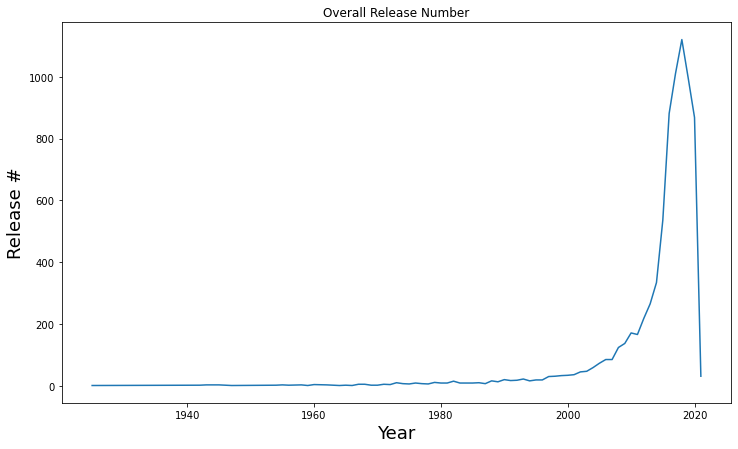

In [19]:
plt.figure(figsize=(12, 7))

# default: sort by value
release_year = df['release_year'].value_counts()
# sort by year
release_year_sort = release_year.sort_index(ascending=False)

plt.title("Overall Release Number")
plt.xlabel('Year', fontsize=18)
plt.ylabel('Release #', fontsize=18)
plt.plot(release_year_sort.index ,release_year_sort.values)
release_year_sort

Top 3 years release on Netflix >>>>>>>
2018    1120
2017    1010
2019     996
Name: release_year, dtype: int64
Bottom 3 years release on Netflix >>>>>>>
1959    1
1964    1
1925    1
Name: release_year, dtype: int64
After 2000 >>>>>>>
Bottom 3 years release on Netflix >>>>>>>>
2003    47
2002    45
2001    36
Name: release_year, dtype: int64


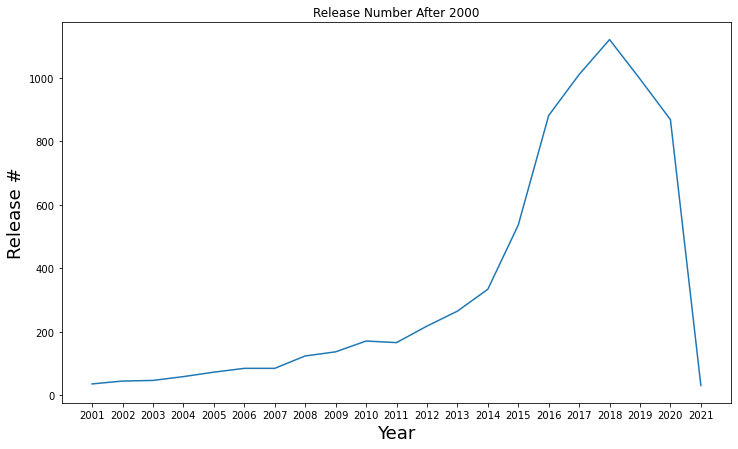

In [20]:
# zoom into 
plt.figure(figsize=(12, 7))
after_2000_sort = release_year_sort[release_year_sort.index > 2000]
plt.title("Release Number After 2000")
plt.xlabel('Year', fontsize=18)
plt.ylabel('Release #', fontsize=18)
plt.xticks(after_2000_sort.index)
plt.plot(after_2000_sort.index ,after_2000_sort.values)

print("Top 3 years release on Netflix >>>>>>>")
print(release_year.head(3))
print("Bottom 3 years release on Netflix >>>>>>>")
print(release_year.tail(3))
print("After 2000 >>>>>>>")
print("Bottom 3 years release on Netflix >>>>>>>>")
print(release_year[(release_year.index > 2000) & (release_year.index < 2021)].tail(3))

#Note: big drop in 2021 is expected since 2021 hasn't passed yet.

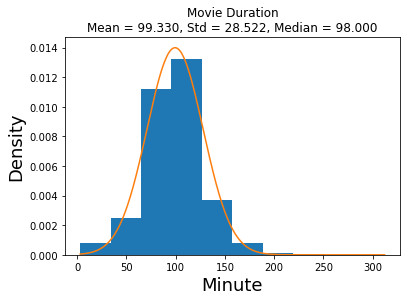

In [21]:
df_movie = df[df['type'] == 'Movie'].copy()
df_movie['duration'] = df_movie['duration'].str.strip(' min').astype(int)

#standard distribution overall
dura_data = df_movie['duration'].sort_values()
dura_std = np.std(dura_data)
dura_mean = np.mean(dura_data)
dura_med = np.median(dura_data)

plt.hist(dura_data, density=True)
plt.plot(dura_data, norm.pdf(dura_data, dura_mean, dura_std))
plt.xlabel('Minute', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Movie Duration\nMean = %.3f, Std = %.3f, Median = %.3f' % (dura_mean, dura_std, dura_med) )
plt.show()